In [1]:
%matplotlib notebook
import os
import os.path as path
import pandas as pd
import h5py
import numpy as np
from faker import Factory
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly
import ipywidgets as widgets

# Local module and scripts
from pyccapt.calibration.calibration_tools import data_tools, variables, tools, reconstruction
from pyccapt.calibration.calibration_tools import reconstruction
from pyccapt.calibration.calibration_tools import widgets as wd


In [2]:
save_fig=False
plot_fig=True 

In [3]:
# flightPathLength = 110 # mm 
# # The initial value for t_0
# t0 = 51.74 # ns

# dataset name
# AL_data_b
# OLO_AL_6_data
# OLO_W_6_data
# OLO_Ni_8_data
# X6Cr17_2V30Min_5_data
# data_1029_Jun-27-2022_15-53_Pd
# data_115_Jul-27-2022_17-44_Powersweep3

In [4]:
tdc, dataset, flightPathLength_d, t0_d = wd.dataset_tdc_selection()
display(tdc, dataset, flightPathLength_d, t0_d)

Dropdown(description='TDC model:', options=('surface_concept', 'roentdec'), value='surface_concept')

Text(value='OLO_AL_6_data', description='Dataset:', placeholder='Paste ticket description here!')

Text(value='110', description='Flight path length:', placeholder='Flight path length')

Text(value='51.74', description='t0:', placeholder='T_0 of the instrument')

$$\textbf{You can specify which dataset to use in below block}$$

In [28]:
tdc_model = tdc.value

dataset_name = dataset.value

flightPathLength = float(flightPathLength_d.value) # mm 
# The initial value for t_0
t0 = float(t0_d.value) # ns

p = path.abspath(path.join("", "../../../.."))

variables.init()

path_main = os.path.join(p, 'tests//data')
filename_main = path_main + '//' + dataset_name + '.h5'

variables.path = os.path.join(p, 'tests//results//load_crop')
variables.result_path = os.path.join(p, 'tests/results/reconstruction/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '_cropped' + '.h5'



head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)


dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

In [29]:
data

dld/high_voltage  dld/pulse_voltage  dld/start_counter        dld/t  \
0             6114.609863        6114.609863            57810.0   618.200694   
1             6114.609863        6114.609863            57812.0  3703.292568   
2             6114.609863        6114.609863            57850.0   596.522556   
3             6114.609863        6114.609863            58108.0   613.256076   
4             6114.609863        6114.609863            58138.0   592.544916   
...                   ...                ...                ...          ...   
1179841       7952.031250        7952.031250            54449.0   536.076144   
1179842       7952.031250        7952.031250            54463.0   534.690828   
1179843       7952.031250        7952.031250            54607.0   540.705294   
1179844       7952.031250        7952.031250            54665.0   541.720278   
1179845       7952.031250        7952.031250            54724.0   530.054820   

             dld/x      dld/y  
0         9.137143 -12.957551  
1        18.369796 -22.349388  
2         5.985306 -10.060408  
3        20.534694 -20.057143  
4        17.764898 -23.304490  
...            ...        ...  
1179841 -12.225306   8.468571  
1179842  -1.114286 -17.860408  
1179843  28.621224  -5.635102  
1179844  28.111837  -9.232653  
1179845   2.833469  -4.266122  

[1179846 rows x 6 columns]

In [30]:
# t0
dld_t = dld_t - t0

In [31]:
# Remove negative and zero TOF
threshold = 60
dld_highVoltage = dld_highVoltage[dld_t>threshold]
dld_pulseVoltage = dld_pulseVoltage[dld_t>threshold]
dld_x = dld_x[dld_t>threshold]
dld_y = dld_y[dld_t>threshold]
dld_t = dld_t[dld_t>threshold]

In [32]:
mc_oxcart = np.array(pd.DataFrame(np.array(h5py.File(filename)['cropped_dld']['mc'])))

09-27-2022 11:52:22 | INFO | Selected Mode = count
09-27-2022 11:52:22 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


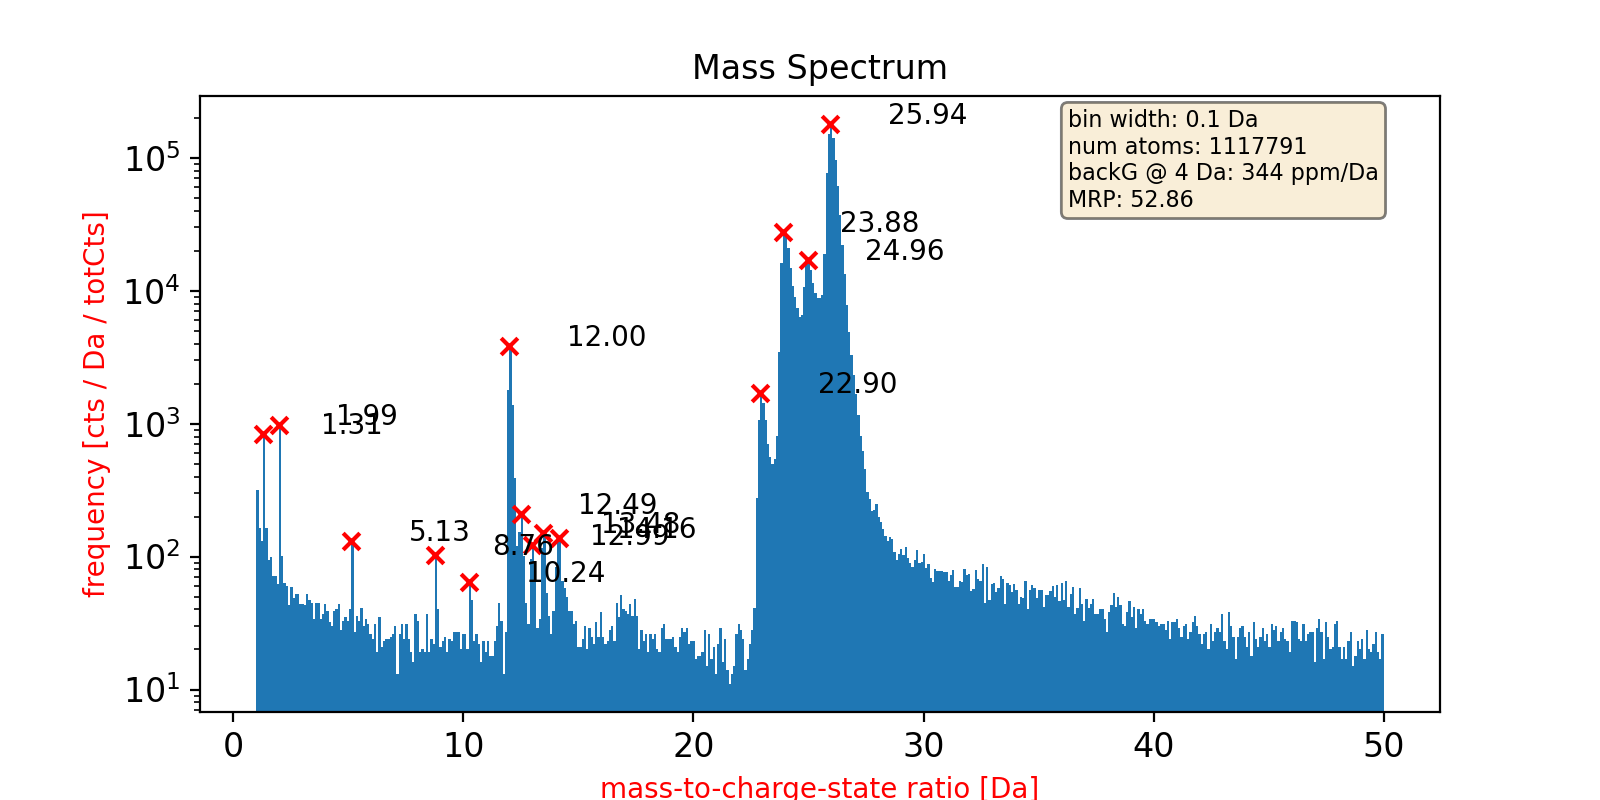

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [52.86015549]
Peaks  0 is: 1.31 peak window sides are: 1.21 - 1.40
Peaks  1 is: 1.99 peak window sides are: 1.89 - 2.09
Peaks  2 is: 5.13 peak window sides are: 5.04 - 5.23
Peaks  3 is: 8.76 peak window sides are: 8.67 - 8.86
Peaks  4 is: 10.24 peak window sides are: 10.14 - 10.43
Peaks  5 is: 12.00 peak window sides are: 11.91 - 12.10
Peaks  6 is: 12.49 peak window sides are: 11.81 - 12.59
Peaks  7 is: 12.99 peak window sides are: 12.79 - 13.18
Peaks  8 is: 13.48 peak window sides are: 13.28 - 13.57
Peaks  9 is: 14.16 peak window sides are: 13.87 - 14.26
Peaks  10 is: 22.90 peak window sides are: 22.70 - 23.19
Peaks  11 is: 23.88 peak window sides are: 23.68 - 24.27
Peaks  12 is: 24.96 peak window sides are: 24.66 - 26.63
Peaks  13 is: 25.94 peak window sides are: 25.74 - 26.24


In [33]:
max_hist_p, left_right_peaks_p, peaks_sides_p, max_paek_edges_p, index_max_p = tools.massSpecPlot(mc_oxcart[mc_oxcart < 50], 0.1, prominence=40, distance=2, text_loc='right', percent=50, plot=True, fig_name='oxcart_mc'+figname)
mrp = (max_hist_p / (left_right_peaks_p[1] - left_right_peaks_p[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
peak_list = []
for i in range(len(peaks_sides_p)):
    peak_list.append(peaks_sides_p[i,0])
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_p[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_p[i,2], peaks_sides_p[i,3]))

In [21]:
element = wd.density_field_selection()
display(element)

Dropdown(description='Element', options=((1, 'H', 52.7, 0.0), (2, 'He', 28.7, 0.0), (3, 'Li', 46.3, 14.0), (4,…

In [22]:
avg_dens = widgets.FloatText(
    value=element.value[2],
    description='Desnsity:',
    disabled=False
)
field_evap = widgets.FloatText(
    value=element.value[3],
    description='Filed_Evap:',
    disabled=False
)
kf = widgets.FloatText(
    value=4,
    description='K_f:',
    disabled=False
)
det_eff = widgets.FloatText(
    value=0.7,
    description='det_eff:',
    disabled=False
)
icf = widgets.FloatText(
    value=1.4,
    description='ICF:',
    disabled=False
)
flight_path_length = widgets.FloatText(
    value=110,
    description='Flight_path_lenght:',
    disabled=False
)
display(avg_dens, field_evap, kf, det_eff, icf, flight_path_length)

FloatText(value=83.3, description='Desnsity:')

FloatText(value=27.0, description='Filed_Evap:')

FloatText(value=4.0, description='K_f:')

FloatText(value=0.7, description='det_eff:')

FloatText(value=1.4, description='ICF:')

FloatText(value=110.0, description='Flight_path_lenght:')

In [44]:
px, py, pz = reconstruction.atom_probe_recons_from_detector_Gault_et_al(dld_x, dld_y, dld_highVoltage, flight_path_length=flight_path_length.value, kf=kf.value, det_eff=det_eff.value, icf=icf.value, field_evap=field_evap.value, avg_dens=60.2)

In [35]:
# px, py, pz = reconstruction.atom_probe_recons_Bas_et_al(dld_x, dld_y, dld_highVoltage, flight_path_length=flight_path_length.value, kf=kf.value, det_eff=det_eff.value, icf=icf.value, field_evap=field_evap.value, avg_dens=60.2)

In [36]:
peak_list

[1.305443794983686,
 1.992479316612287,
 5.133213129771606,
 8.76468660123707,
 10.2369055761555,
 12.003568346057618,
 12.494308004363761,
 12.985047662669905,
 13.475787320976048,
 14.16282284260465,
 22.897988760454005,
 23.879468077066292,
 24.95909532533981,
 25.940574641952097]

In [37]:
phases = ['H1(+)', 'H2(+)', '5.13', '8.76', 'P(3+)', 'C12(+)', '12.49', 'C13(+)', '13.47', 'Si28(+)', '22.89', '23.87', 'Cr50(2+)', 'Cr52(2+)']
colors = ['#ab2020', '#224d90', '#47684c', '#e2e14c', '#0492c2', '#7ea1ad', '#8b324d', '#7b7cf8', '#74632b', '#eed5b7', '#0c2aac', '#50ffd6', '#c9f2c9','#99c35f']
# phases = ['H1(+)', 'Al(2+)', 'Al(+)' ]
# colors = ['#ab2020', '#224d90', '#47684c']

In [45]:
fake = Factory.create()
plotly_data = list()
max_plot = 0.1
for index, element in enumerate(phases):
    mask = np.logical_and((peaks_sides_p[index,2] < mc_oxcart), (mc_oxcart < peaks_sides_p[index,3])).squeeze()
    print(mask[mask==True].shape)
    # to reduce the number of ions to plot base on the input maxplot percent
    if index==12 or index==13:
        max_plot = 0.02
    index_true = np.where(mask==True)
    index_get_to_false = np.random.choice(index_true[0], size=int(index_true[0].shape[0] - index_true[0].shape[0]*max_plot), replace=False)
    mask[index_get_to_false] = False
    print('ploted ions',mask[mask==True].shape)
    
    scatter = dict(
        mode="markers",
        name=element,
        type="scatter3d",
        x=px[mask], y=py[mask], z=pz[mask],
        opacity = 0.2,
        marker = dict(size=2, color=colors[index]) #fake.hex_color()
    )
    plotly_data.append(scatter)

layout = dict(
    title = 'APT 3D Point Cloud',
    scene = dict(xaxis = dict(zeroline=False, title='x (nm)'),
                yaxis = dict(zeroline=False, title='y (nm)'),
                zaxis = dict(zeroline=False, title='z (nm)', autorange='reversed'))
)

fig = dict(data=plotly_data, layout=layout)

init_notebook_mode(connected=True)  
# plotly.offline.plot(fig, filename=variables.result_path + '\\{fn}.html'.format(fn=figname), show_link=False)
iplot(fig)

(968,)
ploted ions (97,)
(1043,)
ploted ions (105,)
(170,)
ploted ions (17,)
(125,)
ploted ions (13,)
(131,)
ploted ions (14,)
(5650,)
ploted ions (565,)
(7921,)
ploted ions (793,)
(315,)
ploted ions (32,)
(302,)
ploted ions (31,)
(388,)
ploted ions (39,)
(5532,)
ploted ions (554,)
(110423,)
ploted ions (11043,)
(912191,)
ploted ions (18244,)
(646744,)
ploted ions (12935,)


In [ ]:
ax = plt.figure().add_subplot(111)
for element in phases:
    ax.scatter(py, pz, s=2, label=element)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.set_xlabel('Y (nm)')
ax.xaxis.set_label_position('top')
ax.set_ylabel('Z (nm)')
plt.legend()
plt.savefig(variables.result_path + '\\output_{fn}.png'.format(fn=figname))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

mask = np.random.randint(0, len(px), 300)

ax.scatter(px[mask], py[mask], pz[mask])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')

plt.show()